**Credit:**
*This notebook contains an excerpt from the [Whirlwind Tour of Python](http://www.oreilly.com/programming/free/a-whirlwind-tour-of-python.csp) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/WhirlwindTourOfPython).*



**Presented by** : [Mohammad Abualhoul](https://www.linkedin.com/in/m-yakub/)




# Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [ ]:
import numpy as np

In [ ]:
L = np.random.random(100)
L

array([0.57411961, 0.45326234, 0.93482929, 0.54643126, 0.42467077,
       0.53627291, 0.6736041 , 0.65892954, 0.11556023, 0.22530651,
       0.83734603, 0.165051  , 0.23189937, 0.90540508, 0.72104135,
       0.75527443, 0.57104103, 0.28165394, 0.41205486, 0.47123499,
       0.82507803, 0.64260047, 0.75133655, 0.68334997, 0.20314655,
       0.69255927, 0.92391273, 0.41458616, 0.7949607 , 0.96269361,
       0.45216296, 0.11171368, 0.15569091, 0.29268716, 0.57129769,
       0.24484413, 0.15468444, 0.84464287, 0.1264229 , 0.42317191,
       0.75089473, 0.03344629, 0.60379858, 0.27978017, 0.56338199,
       0.15164116, 0.25787173, 0.55576606, 0.22482338, 0.96999353,
       0.58004956, 0.58196344, 0.16346592, 0.2091372 , 0.17649251,
       0.86019475, 0.52426581, 0.72459821, 0.56764022, 0.66935351,
       0.1251038 , 0.53103785, 0.54394308, 0.93864563, 0.77162201,
       0.2513194 , 0.47784936, 0.44985563, 0.62791026, 0.61947366,
       0.74536041, 0.96614067, 0.81479799, 0.86091864, 0.92076

In [ ]:
L.shape

(100,)

In [ ]:
sum(L)

53.90664558073434

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [ ]:
np.sum(L)

53.90664558073434

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [ ]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 5: 156 ms per loop
1000 loops, best of 5: 377 µs per loop


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [ ]:
big_array

array([0.97606321, 0.75669226, 0.20657791, ..., 0.81073036, 0.99760929,
       0.44125025])

In [ ]:
min(big_array), max(big_array)

(8.675628592191842e-07, 0.9999988414927815)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [ ]:
np.min(big_array), np.max(big_array)

(8.675628592191842e-07, 0.9999988414927815)

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 5: 94.1 ms per loop
1000 loops, best of 5: 422 µs per loop


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [ ]:
print(big_array.min(), big_array.max(), big_array.sum())

1.999178743883334e-06 0.9999992791881295 500480.97407390916


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [ ]:
M = np.random.random((3, 4))
print(M)

[[0.30952032 0.5119707  0.16712347 0.85852126]
 [0.80066424 0.61941417 0.95876116 0.40258085]
 [0.58150347 0.17681612 0.22846777 0.4777956 ]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [ ]:
M.sum()

6.09313912060023

In [ ]:
sum(M)

array([1.69168803, 1.30820098, 1.3543524 , 1.73889771])

In [ ]:
M.shape

(3, 4)

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [ ]:
M.min(axis=1)

array([0.16712347, 0.40258085, 0.17681612])

In [ ]:
M

array([[0.30952032, 0.5119707 , 0.16712347, 0.85852126],
       [0.80066424, 0.61941417, 0.95876116, 0.40258085],
       [0.58150347, 0.17681612, 0.22846777, 0.4777956 ]])

In [ ]:
M.sum(axis=0)

array([1.69168803, 1.30820098, 1.3543524 , 1.73889771])

In [ ]:
M.sum(axis=1)

array([1.84713576, 2.78142041, 1.46458296])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [ ]:
M.max(axis=1)

array([0.87603177, 0.38043986, 0.89534277])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

In [ ]:
M

array([[0.30952032, 0.5119707 , 0.16712347, 0.85852126],
       [0.80066424, 0.61941417, 0.95876116, 0.40258085],
       [0.58150347, 0.17681612, 0.22846777, 0.4777956 ]])

In [ ]:
np.nanpercentile()

In [ ]:
M.max()

0.9587611593235087

In [ ]:
np.nanpercentile(M,100)

0.9587611593235087

In [ ]:
np.nanpercentile(M,0)

0.16712347266253846

In [ ]:
np.nanpercentile(M, [0, 100])

array([0.16712347, 0.60804096])

In [ ]:
np.nanpercentile(M, 50, axis=1)

array([0.41074551, 0.7100392 , 0.35313168])

In [ ]:
M

array([[0.30952032, 0.5119707 , 0.16712347, 0.85852126],
       [0.80066424, 0.61941417, 0.95876116, 0.40258085],
       [0.58150347, 0.17681612, 0.22846777, 0.4777956 ]])

In [ ]:
np.nanpercentile(M,70)

0.6915680848305505

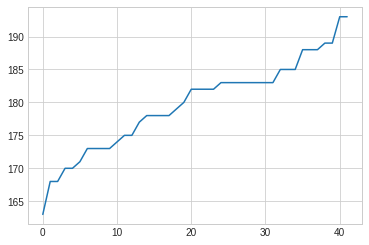

In [ ]:
plt.plot(np.sort(heights))

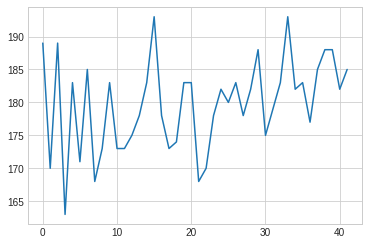

In [ ]:
plt.plot(heights)

In [ ]:
x=np.array([True, True, True])


In [ ]:
x

array([ True,  True, False])

In [ ]:
x.all()

True

### <p><img alt="Colaboratory logo" height="30px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>**`Hands-on`**
**What is the Average Height of US Presidents?**



Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

In [ ]:
!head -4 data/president_heights.csv

head: data/president_heights.csv: No such file or directory


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/abualhoul44/HTU-DS-2021/main/Data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Now that we have this data array, compute the following statistics:

In [ ]:
#Mean height
Mean_height=

In [ ]:
#Standard deviation
Standard_deviation=

In [ ]:
#Minimum height
Minimum_height=

In [ ]:
#Maximum height
Maximum_height=

In [ ]:
#25th percentile
percentile_1=

In [ ]:
#Median
Median=

In [ ]:
#75th percentile
percentile_2=

In [ ]:
print("Mean height:       ",Mean_height)
print("Standard deviation:", Standard_deviation))
print("Minimum height:    ", Minimum_height)
print("Maximum height:    ", Maximum_height)
print("25th percentile:   ", percentile_1)
print("Median:            ", Median)
print("75th percentile:   ", percentile_2)

In [ ]:
# Run the following cells to visualize the varaibles. 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

(array([ 1.,  2.,  3.,  5.,  3.,  6., 12.,  3.,  5.,  2.]),
 array([163., 166., 169., 172., 175., 178., 181., 184., 187., 190., 193.]),
 <a list of 10 Patch objects>)

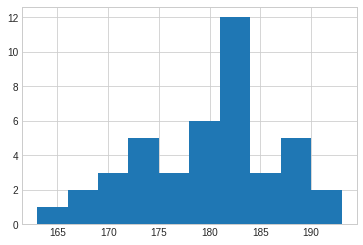

In [ ]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

(array([ 1.,  2.,  3.,  5.,  3.,  6., 12.,  3.,  5.,  2.]),
 array([163., 166., 169., 172., 175., 178., 181., 184., 187., 190., 193.]),
 <a list of 10 Patch objects>)

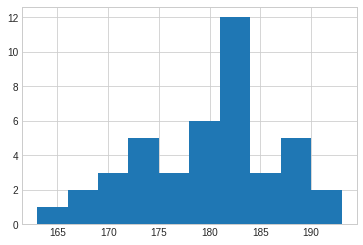

In [ ]:
plt.hist(Sorted)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.